In [1]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15, 8]
matplotlib.rcParams.update({'font.size': 16})
import math
import bitstruct.c as bitstruct

In [2]:
def getDataRaw(fnames):
    data = []
    data_format=bitstruct.compile("p8s18p3p3"*(1025*8)+"u64"*(1025))
    swapformat="4"*(1025*8)+"8"*(1025)
    for fname in fnames:
        print(fname)
        with open(fname, "rb") as f:
            line = f.read(1025*10*4+1)
            while len(line) == 1025*10*4+1:
                data.extend(data_format.unpack(bitstruct.byteswap(swapformat, line)))
                #data.extend(data_format.unpack(line))
                line = f.read(1025*10*4+1)
    data = np.array(data)
    return data.reshape([-1, 9, 1025])

In [3]:
data = getDataRaw(["data_0.dat"])

data_0.dat


data_0.dat


/tmp/ipykernel_24505/1872610659.py:6: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


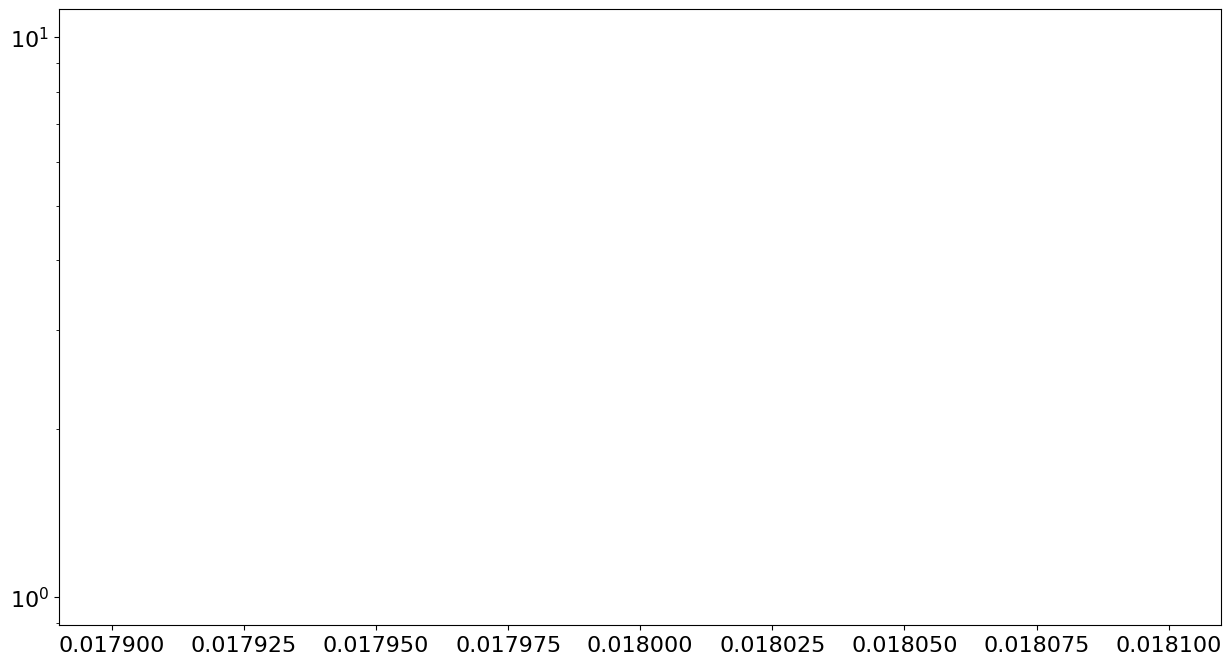

In [4]:
data = getDataRaw(["data_0.dat"])
flat_data = data[:,:,1:].reshape([-1, 9, int(1024/8), 8])[:,8,0:,1].flatten()*60/1000000
dt = flat_data[1:]-flat_data[:-1]
#dt = dt[4140000:4200000]
plt.hist(dt,bins=np.linspace(0.0179, 0.0181, 100))#dt.max(), 100))
plt.yscale("log")
#plt.plot(dt)
#plt.plot(flat_data)

data_0.dat
data_0_withGround.dat
(2440, 128)
(2440, 128)


Text(0.5, 0, 'time [ms]')

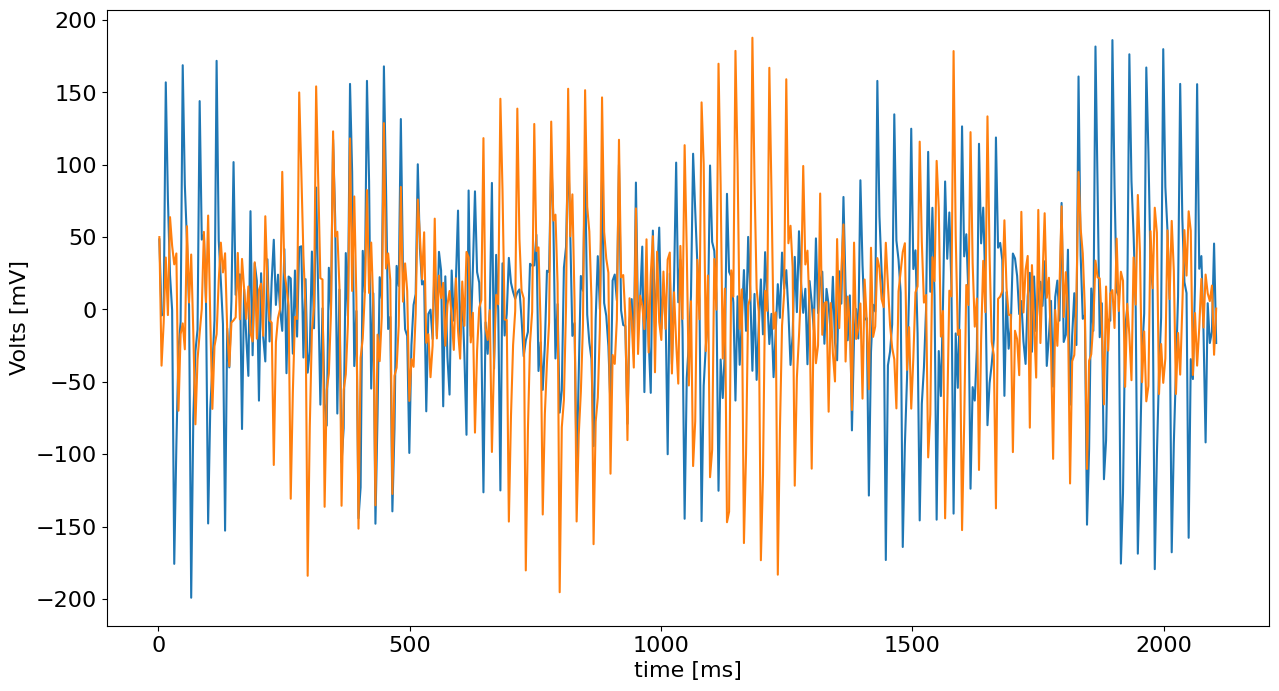

In [24]:
event = slice(None)
subevent = slice(None)

plt.clf()
data1 = getDataRaw(["data_0.dat"])
data2 = getDataRaw(["data_0_withGround.dat"])
for label, data in [("no ground", data1)]:#, ("grounded", data2)]: 
    rdata=data[:,:,1:].reshape([-1, 9, int(1024/8), 8])
    for chip in [5]:
        for channel in [6,7]:
            time = rdata[event,8,subevent,channel]*60/1000000
            ydata = rdata[event,chip,subevent,channel]#.flatten()#*5/(2**18)
            print(ydata.shape)
            ##ydata = ydata[(ydata > 100000) | (ydata < -100000)]
            #cut = ydata > 100000
            ##ydata[cut] = ((~ydata[cut]) & 0x1fff)
            #cut2 = ydata < -100000
            ##ydata[cut2] = -(ydata[cut2] & 0x1fff)
            ydata=ydata*10000/(2**18)

            #ydata = ydata[(cut | cut2)]

            #ydata = ydata.flatten()
            #time = time.flatten()
            ydata = ydata.mean(axis=1)[:500]
            time = time.mean(axis=1)[:500]

            plt.plot(time,ydata, label=label)

            N = len(ydata)
            T = 0.00001368
            #yf = fft(ydata)
            #xf = fftfreq(N, T)[:N//2]
            #plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), label=label)

            #plt.hist(ydata, bins=np.linspace(-1000, 1000, 200), histtype=u'step', label=label)
            #plt.hist(time[1:]-time[:-1], bins=np.linspace(225, 235, 201), histtype=u'step', label=label)

#plt.legend()
#plt.axhline(y = 0, color = 'r', linestyle = '-')
#plt.axvline(x=60, color = 'r', linestyle = '-')
#plt.ylim(-0.02, 0.02)
plt.ylabel("Volts [mV]")
plt.xlabel("time [ms]")
#plt.yscale("log")

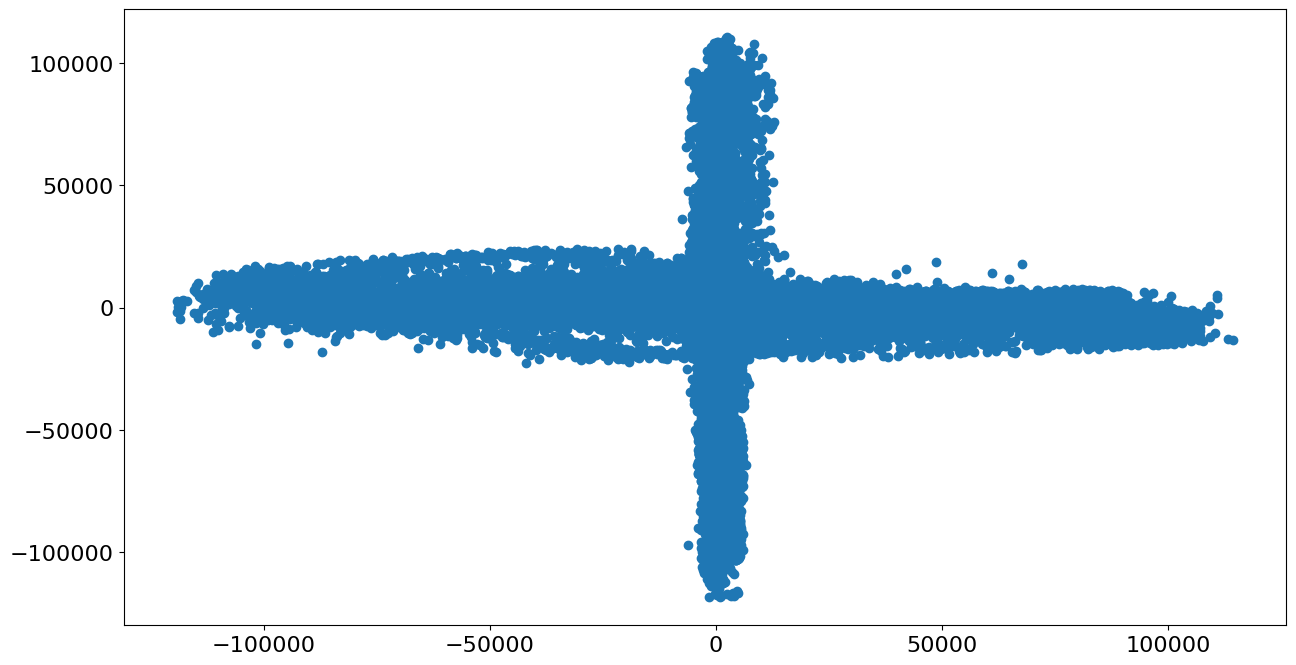

In [18]:
offset = 100000
s = slice(None)
x = rdata[:,6,:,4].flatten()[s]
y = rdata[:,6,:,7].flatten()[s]
plt.scatter(x, y)

In [10]:
plt.hist(x[(y > 15000) | (y < -15000)]*10000/(2**18), bins=np.linspace(-1000, 1000, 200), histtype=u'step')
plt.hist(x*10000/(2**18), bins=np.linspace(-1000, 1000, 200), histtype=u'step')
plt.yscale("log")

NameError: name 'x' is not defined

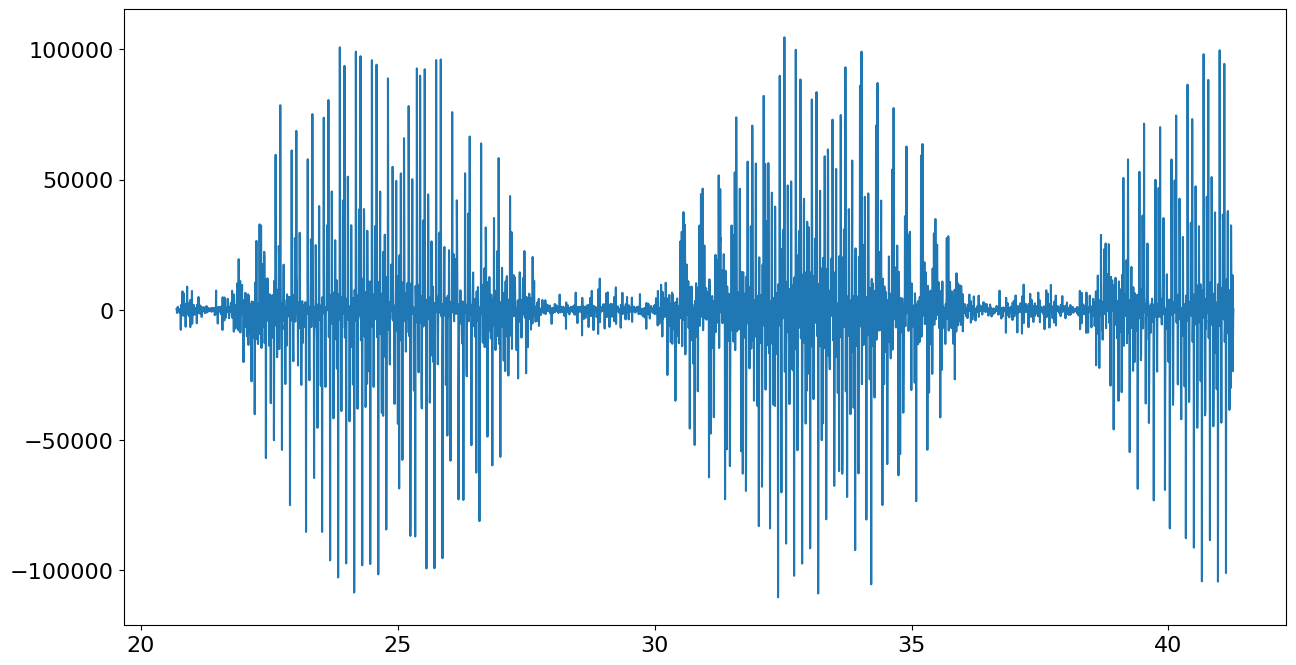

In [9]:
plt.plot(rdata[:,8,:,:].flatten()[5000:10000]*60/1000000, rdata[:,6,:,:].flatten()[5000:10000])